# Telecom : Exam 2021

## Table of content <br>
* [Import](#Import)<br>
* [Utilities](#Utilities)<br>
* [Read](#Read)<br>
* [Data mining and cleaning](#DMC)<br>
    * [Overview](#Overview)<br>
    * [Data Cleaning](#DataCleaning)<br>
    * [Data Analyse](#DataAnalyse)<br>
    * [Data Visualisation](#Graphs)<br>
* [Data Modeling](#DataModeling)<br>
    * [Preprocessing](#Prepro)<br>
    * [Encodage](#Encodage)<br>
    * [Feature Selection](#FeatSelec)<br>
* [Testing and modeling](#TestsModels)
    * [KNN](#KNN)<br>
    * [Decision Tree](#DT)<br>
    * [Random Forest](#RF)<br>
* [Improvements](#Improvements)<br>
    * [Random Forest parameters improvement](#RFPI)<br>
    * [Decision Tree hyperparameters improvement](#DTHI)<br>
    * [Random Forest hyperparameters improvement](#RFHI)<br>
* [Model performance according to the train set size](#ModelPerf)
* [Linear Regression](#LR)<br>
    * [Dataset](#Data)<br>
    * [Model](#model)<br>
    * [Cost function](#CF)<br>
    * [Gradient descent](#GD)<br>
    * [Train and evaluate the model](#TEM)<br>
    * [With Sklearn](#WS)<br>




## Import <a id ="Import"></a>

In this part we centralised all the stuff we need

In [3755]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import OneHotEncoder

### Utilities <a id="Utilities"></a>

In this part we centralised all the method we took from the lessons

In [3756]:
def data_overview(df):
    print("####### Data overview #######")
    print("dataset")
    print("__________")
    print(df)
    print("head")
    print("_____")
    print()
    print(df.head(10))
    print()
    print("Rows - columns :" , df.shape)
    print("Number of features : ",df.shape[1]-1)
    print()
    print("Liste des colonnes : ")
    print("_____________________")
    print()
    print(df.columns)
    print()
    print("Liste des types : ")
    print("_____________________")
    print()
    print(df.info())
    print()
    print("Valeurs manquantes par colonne: ")
    print("________________________________")
    print()
    print(df.isnull().sum())
    print()
    print()
    print("Nombre total de valeurs manquantes: ")
    print("____________________________________")
    print()
    print(df.isnull().sum().values.sum())
    print()
    print("Nbre de valeurs différent es par colonne : ")
    print("__________________________________________")
    print()
    print(df.nunique())

In [3757]:
def categorical_plots(df,categorical):
    import matplotlib.pyplot as plt
    i=0
    for i,cat_v in enumerate(categorical):
        plt.figure(figsize=(10,24))
        plt.subplots(1,1)
        df[cat_v].value_counts().plot(kind="bar", title=cat_v)
        plt.ylabel('Frequency')

In [3758]:
def features_plots(df,numerical):
    import matplotlib.pyplot as plt
    for i,cv in enumerate(numerical):
        plt.figure(figsize=(10,24))
        plt.subplot(7,2,i+1)
        plt.hist(df[cv],bins=df[cv].nunique())
        plt.title(cv)
        plt.ylabel('frequency')
        plt.show()
    for i,cv in enumerate(numerical):
        plt.figure(figsize=(10,24))
        plt.subplot(7,2,i+3)
        plt.boxplot(df[cv])
        plt.title(cv)
        plt.ylabel('boxplot')
        plt.show()

In [3759]:
def data_preprocessing(X,y,hot_encoder,binarizer,selector):
    X_categorical=X[ :,0:4]
    X_numerical=X[ :,4:6]
    
    X_categorical=hot_encoder.transform(X_categorical)
    X=np.hstack((X_categorical,X_numerical))
    Y=binarizer.transform(y)
    
    X=selector.transform(X)
    return X,Y

In [3760]:
def binary_classifier_evaluation(title,x_test, y_test, y_pred, y_pred_proba,clf) : 
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn.metrics import roc_auc_score
    import matplotlib.pyplot as plt
    print("=======================")
    print(title)
    print("=======================")
    print()
    print()
    
    # confusion_matrix
    print("CONFUSION MATRIX : ")
    print()
    print(confusion_matrix(y_test, y_pred))
    print()
    print()
    
    
    # the accuracy of the model
    print("ACCURACY OF THE MODEL : ")
    print()
    print(clf.score(x_test, y_test))
    print()
    print()
    
    # classification report
    print("CLASSIFICATION REPORT : ")
    print()
    print(classification_report(y_test, y_pred))
    print()
    print()
    
    # score roc
    print("ROC-AUC SCORE : ")
    print()
    print(roc_auc_score(y_test, y_pred)) 
    print()
    print()
    
    # courbe roc
    print("ROC CURVE : ")
    print()
    y_pred_proba_1 = y_pred_proba[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba_1)
    plt.plot(fpr, tpr, color='coral', lw=2)
    print("False positivze rate", fpr)
    print("True negative rate", tpr)
    print("Thresholds", thresholds)
    

## Read <a id="Read"></a>

In this part we load the dataset file into the notebook

In [3761]:
df_telecoms = pd.read_csv("churn-bigml-80.csv", delimiter=",")

Here it's the five first rows

In [3762]:
df_telecoms.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Data mining and cleaning <a id="DMC"></a>

#### Overview <a id="Overview"></a>

In this part we visualise the dataset in details

In [3763]:
data_overview(df_telecoms)

####### Data overview #######
dataset
__________
     State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
2661    SC              79        415                 No              No   
2662    AZ             192        415                 No             Yes   
2663    WV              68        415                 No              No   
2664    RI              28        510                 No              No   
2665    TN              74        415                 No             Yes   

      Number vmail messages  Total day

#### Data Cleaning <a id="DataCleaning"></a>

Delete the "Total ... calls"

In [3765]:
columns_to_drop = ["Total day calls","Total eve calls","Total night calls","Total intl calls"]
df_telecoms = df_telecoms.drop(columns_to_drop, axis=1)

Replace the "total ... minutes" and "Total ... charges" columns into a "... cost per minute"

In [3766]:
df_telecoms["Day cost per minute"] = round((df_telecoms["Total day charge"] / df_telecoms["Total day minutes"]),2)
df_telecoms["Day cost per minute"] = df_telecoms["Day cost per minute"].fillna(0)
df_telecoms.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night charge,Total intl minutes,Total intl charge,Customer service calls,Churn,Day cost per minute
0,KS,128,415,No,Yes,25,265.1,45.07,197.4,16.78,244.7,11.01,10.0,2.70,1,False,0.17
1,OH,107,415,No,Yes,26,161.6,27.47,195.5,16.62,254.4,11.45,13.7,3.70,1,False,0.17
2,NJ,137,415,No,No,0,243.4,41.38,121.2,10.30,162.6,7.32,12.2,3.29,0,False,0.17
3,OH,84,408,Yes,No,0,299.4,50.90,61.9,5.26,196.9,8.86,6.6,1.78,2,False,0.17
4,OK,75,415,Yes,No,0,166.7,28.34,148.3,12.61,186.9,8.41,10.1,2.73,3,False,0.17


In [3767]:
df_telecoms["Eve cost per minute"] = round((df_telecoms["Total eve charge"] / df_telecoms["Total eve minutes"]),2)
df_telecoms["Eve cost per minute"] = df_telecoms["Eve cost per minute"].fillna(0)
df_telecoms.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night charge,Total intl minutes,Total intl charge,Customer service calls,Churn,Day cost per minute,Eve cost per minute
0,KS,128,415,No,Yes,25,265.1,45.07,197.4,16.78,244.7,11.01,10.0,2.70,1,False,0.17,0.09
1,OH,107,415,No,Yes,26,161.6,27.47,195.5,16.62,254.4,11.45,13.7,3.70,1,False,0.17,0.09
2,NJ,137,415,No,No,0,243.4,41.38,121.2,10.30,162.6,7.32,12.2,3.29,0,False,0.17,0.08
3,OH,84,408,Yes,No,0,299.4,50.90,61.9,5.26,196.9,8.86,6.6,1.78,2,False,0.17,0.08
4,OK,75,415,Yes,No,0,166.7,28.34,148.3,12.61,186.9,8.41,10.1,2.73,3,False,0.17,0.09


In [3768]:
df_telecoms["Night cost per minute"] = round((df_telecoms["Total night charge"] / df_telecoms["Total night minutes"]),2)
df_telecoms["Night cost per minute"] = df_telecoms["Night cost per minute"].fillna(0)
df_telecoms.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night charge,Total intl minutes,Total intl charge,Customer service calls,Churn,Day cost per minute,Eve cost per minute,Night cost per minute
0,KS,128,415,No,Yes,25,265.1,45.07,197.4,16.78,244.7,11.01,10.0,2.70,1,False,0.17,0.09,0.04
1,OH,107,415,No,Yes,26,161.6,27.47,195.5,16.62,254.4,11.45,13.7,3.70,1,False,0.17,0.09,0.05
2,NJ,137,415,No,No,0,243.4,41.38,121.2,10.30,162.6,7.32,12.2,3.29,0,False,0.17,0.08,0.05
3,OH,84,408,Yes,No,0,299.4,50.90,61.9,5.26,196.9,8.86,6.6,1.78,2,False,0.17,0.08,0.04
4,OK,75,415,Yes,No,0,166.7,28.34,148.3,12.61,186.9,8.41,10.1,2.73,3,False,0.17,0.09,0.04


In [3769]:
df_telecoms["Intl cost per minute"] = round((df_telecoms["Total intl charge"] / df_telecoms["Total intl minutes"]),2)
df_telecoms["Intl cost per minute"] = df_telecoms["Intl cost per minute"].fillna(0)
df_telecoms.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night charge,Total intl minutes,Total intl charge,Customer service calls,Churn,Day cost per minute,Eve cost per minute,Night cost per minute,Intl cost per minute
0,KS,128,415,No,Yes,25,265.1,45.07,197.4,16.78,244.7,11.01,10.0,2.70,1,False,0.17,0.09,0.04,0.27
1,OH,107,415,No,Yes,26,161.6,27.47,195.5,16.62,254.4,11.45,13.7,3.70,1,False,0.17,0.09,0.05,0.27
2,NJ,137,415,No,No,0,243.4,41.38,121.2,10.30,162.6,7.32,12.2,3.29,0,False,0.17,0.08,0.05,0.27
3,OH,84,408,Yes,No,0,299.4,50.90,61.9,5.26,196.9,8.86,6.6,1.78,2,False,0.17,0.08,0.04,0.27
4,OK,75,415,Yes,No,0,166.7,28.34,148.3,12.61,186.9,8.41,10.1,2.73,3,False,0.17,0.09,0.04,0.27


Remove the non-essentials columns to make a clean and exploitable dataframe

In [3770]:
non_essentials_data = ['Number vmail messages', 'Total day minutes',
       'Total day charge', 'Total eve minutes', 'Total eve charge',
       'Total night minutes', 'Total night charge', 'Total intl minutes',
       'Total intl charge']
df_telecoms = df_telecoms.drop(non_essentials_data, axis=1)

We can see that, according to few minor exceptions, the four new column have no impact on the decision to the customer to leave this company so we can remove them

In [3773]:
df_telecoms = df_telecoms.drop(['Day cost per minute', 'Eve cost per minute', 'Night cost per minute',
       'Intl cost per minute'],axis=1)

First we create two dataframe, one with the numerical values and one with the categorical values

In [3775]:
categorical_columns = ["State", "Area code", "International plan", "Voice mail plan"]
df_numerical = df_telecoms.drop(categorical_columns,axis=1)
df_numerical = df_numerical.drop("Churn",axis=1)
df_categorical = df_telecoms.drop(df_numerical,axis=1)
df_categorical = df_categorical.drop("Churn",axis=1)

Now we have two dataframe, one with numerical values, the other with categorical values

We create here the target list

In [3776]:
df_labels = df_telecoms["Churn"]

#### Data Analyse <a id="DataAnalyse"></a>

Here we see the describe content

In [3777]:
df_numerical.describe()

,Account length,Customer service calls
count,2666.000000,2666.000000
mean,100.620405,1.562641
std,39.563974,1.311236
min,1.000000,0.000000
25%,73.000000,1.000000
50%,100.000000,1.000000
75%,127.000000,2.000000
max,243.000000,9.000000


Here we change the int type of the Area code because it's more an information or a category than a relevant number

In [3779]:
df_categorical=df_categorical.astype({"Area code":object})
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               2666 non-null   object
 1   Area code           2666 non-null   object
 2   International plan  2666 non-null   object
 3   Voice mail plan     2666 non-null   object
dtypes: object(4)
memory usage: 83.4+ KB


### Data visualisation <a id="Graphs"></a>

Here we see four diagrams that represent each tendancy of each categorical values

<Figure size 720x1728 with 0 Axes>

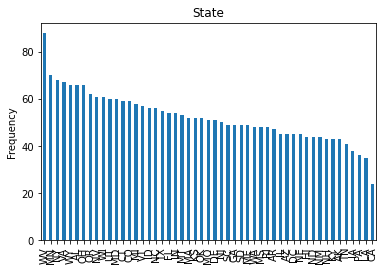

<Figure size 720x1728 with 0 Axes>

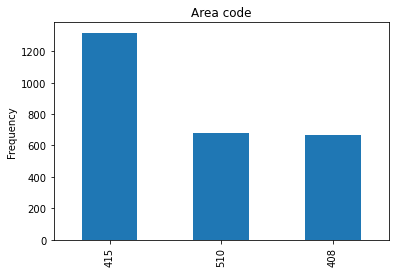

<Figure size 720x1728 with 0 Axes>

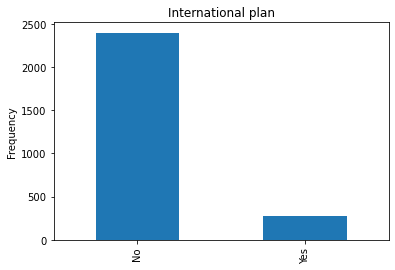

<Figure size 720x1728 with 0 Axes>

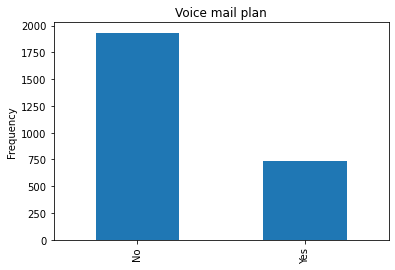

In [3780]:
categorical_plots(df_telecoms,df_categorical)

Here we see the boxplot of each numerical values

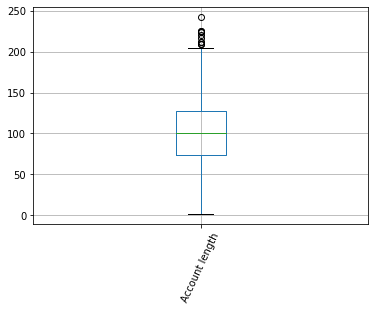

In [3781]:
df_numerical_columns = ['Account length', 'Customer service calls']
boxplot=df_telecoms.boxplot(column=df_numerical_columns[0:1], rot=65)

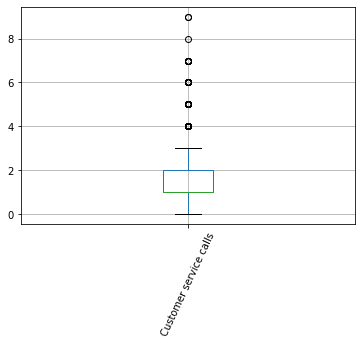

In [3782]:
boxplot=df_telecoms.boxplot(column=df_numerical_columns[1:2], rot=65)

## Data modeling <a id="DataModeling"></a>

### Preprocessing <a id="Prepro"></a>

Here we transform into numpy array the categorical and numerical dataframe, next we concat them to make ndarray that contain all our numpy data

Next we make our target series as our y vector then we reshape it to avoid the missing dimension

In [3783]:
X_categ=df_categorical.to_numpy()
X_numeric=df_numerical.to_numpy()
X=np.hstack((X_categ,X_numeric))
y=df_labels.to_numpy()
y = y.reshape(y.shape[0],1)

In [3784]:
print(X.shape)
print(y.shape)

(2666, 6)
(2666, 1)


X and y are done and ready to be exploit

We make our train and test sets

In [3785]:
X_train, X_test, y_train, y_test=train_test_split(X,y,stratify=y,test_size=0.3,random_state=2)

### Encodage <a id="Encodage"></a>

In [3787]:
print(X_train.shape)
X_train_categorical=X_train[ :,0:4]
X_train_numerical=X_train[ :, 4:6]
print(X_train_categorical.shape,X_train_numerical.shape)

(1866, 6)
(1866, 4) (1866, 2)


In [3788]:
# Encodage One Hot
hot_encoder=OneHotEncoder(sparse=False)
X_train_categorical=hot_encoder.fit_transform(X_train_categorical)
print(X_train_categorical.shape)

(1866, 58)


In [3789]:
hot_encoder.categories_

[array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
        'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object),
 array([408, 415, 510], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [3790]:
X_train_categorical.shape

(1866, 58)

In [3791]:
X_train_numerical.shape

(1866, 2)

In [3792]:
X_train=np.hstack((X_train_categorical,X_train_numerical))
print(X_train.shape)

(1866, 60)


In [3793]:
# Encodage label binarizer
from sklearn.preprocessing import LabelBinarizer
binarizer=LabelBinarizer()
Y_train=binarizer.fit_transform(y_train)

### Feature selection <a id="FeatSelec"></a>

#### Possibilité d'utiliser le Variance Threshold ou SelectKBest (ici Select K Best)

In [3794]:
#print(chi2(X_train,Y_train))  - n'accepte pas des valeurs standardisées avec Standard Scaler car <0
selector=SelectKBest(chi2,k=8)
X_train=selector.fit_transform(X_train,Y_train)
# X_train

In [3795]:
select=selector.get_support(indices=True)
print(select)
# 11 = GA
# 25 = ME 
# 31 = NH
# 54 = 408
# 55 = 415
# 56 = 510
# 57 = A un plan internantional
# 59 = A un plan mail
X_train

[11 25 31 54 55 56 57 59]


array([[0.0, 0.0, 0.0, ..., 0.0, 1.0, 6],
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 1],
       [0.0, 0.0, 0.0, ..., 0.0, 1.0, 0],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 1.0, 0],
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 0],
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 2]], dtype=object)

In [3796]:
# Pour tous les modèles (mais inutile pour le DT), il faut standardiser les valeurs numériques
X_train_numerical=X_train[:,4:8]
X_train_categorical=X_train[:,0:4]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_numerical=scaler.fit_transform(X_train_numerical)
X_train=np.hstack((X_train_categorical,X_train_numerical))

In [3797]:
X_train.shape

(1866, 8)

In [3798]:
#Appliquer les mêmes transformations à x_test et y_test
X_test,Y_test=data_preprocessing(X_test,y_test,hot_encoder,binarizer,selector)

In [3799]:
print(X_test.shape)

(800, 8)


## Testing and modeling <a id="TestsModels"></a>

Now we are going to do the 3 following models to see wich one is the more accurate to be used

### KNN <a id="KNN"></a>

In [3800]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN=KNeighborsClassifier()
clf_KNN.fit(X_train,Y_train)
y_pred_proba=clf_KNN.predict_proba(X_test)
y_pred=clf_KNN.predict(X_test)

D:\Programmation\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K nearest neighbors


CONFUSION MATRIX : 

[[420 264]
 [ 58  58]]


ACCURACY OF THE MODEL : 

0.5975


CLASSIFICATION REPORT : 

              precision    recall  f1-score   support

           0       0.88      0.61      0.72       684
           1       0.18      0.50      0.26       116

    accuracy                           0.60       800
   macro avg       0.53      0.56      0.49       800
weighted avg       0.78      0.60      0.66       800



ROC-AUC SCORE : 

0.5570175438596491


ROC CURVE : 

False positivze rate [0.         0.19590643 0.38596491 0.58187135 1.        ]
True negative rate [0.         0.29310345 0.5        0.70689655 1.        ]
Thresholds [1.8 0.8 0.6 0.2 0. ]


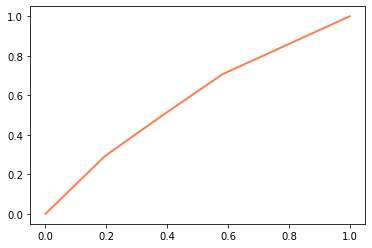

In [3801]:
binary_classifier_evaluation("K nearest neighbors",X_test, Y_test, y_pred, y_pred_proba,clf_KNN)

### Decision Tree <a id="DT"></a>

In [3802]:
from sklearn.tree import DecisionTreeClassifier
clf_DT= DecisionTreeClassifier(random_state=2)
clf_DT.fit(X_train,Y_train)
y_pred_proba=clf_DT.predict_proba(X_test)
y_pred=clf_DT.predict(X_test)

Decision tree


CONFUSION MATRIX : 

[[533 151]
 [ 73  43]]


ACCURACY OF THE MODEL : 

0.72


CLASSIFICATION REPORT : 

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       684
           1       0.22      0.37      0.28       116

    accuracy                           0.72       800
   macro avg       0.55      0.57      0.55       800
weighted avg       0.78      0.72      0.75       800



ROC-AUC SCORE : 

0.5749647106271425


ROC CURVE : 

False positivze rate [0.         0.05409357 0.15789474 0.22076023 0.22660819 0.40935673
 0.43128655 0.43859649 0.46491228 0.7748538  0.97222222 1.        ]
True negative rate [0.         0.29310345 0.36206897 0.37068966 0.42241379 0.62068966
 0.70689655 0.70689655 0.73275862 0.88793103 0.99137931 1.        ]
Thresholds [2.         1.         0.64516129 0.52380952 0.5        0.46153846
 0.26666667 0.25       0.14285714 0.09090909 0.07924528 0.        ]


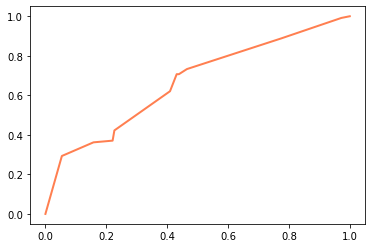

In [3803]:
binary_classifier_evaluation("Decision tree",X_test, Y_test, y_pred, y_pred_proba,clf_DT)

### Random Forest <a id="RF"></a>

In [3804]:
from sklearn.ensemble import RandomForestClassifier
clf_RF=RandomForestClassifier()
clf_RF.fit(X_train,Y_train)
y_pred_proba=clf_RF.predict_proba(X_test)
y_pred=clf_RF.predict(X_test)

<ipython-input-3804-7bde26b7aaac>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_RF.fit(X_train,Y_train)


Random Forest


CONFUSION MATRIX : 

[[578 106]
 [ 67  49]]


ACCURACY OF THE MODEL : 

0.78375


CLASSIFICATION REPORT : 

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       684
           1       0.32      0.42      0.36       116

    accuracy                           0.78       800
   macro avg       0.61      0.63      0.62       800
weighted avg       0.81      0.78      0.80       800



ROC-AUC SCORE : 

0.6337215164347652


ROC CURVE : 

False positivze rate [0.         0.00438596 0.02631579 0.02631579 0.02777778 0.02923977
 0.03508772 0.13450292 0.14035088 0.14035088 0.14766082 0.14766082
 0.15204678 0.15350877 0.15497076 0.15935673 0.22222222 0.2251462
 0.38450292 0.38596491 0.39035088 0.39035088 0.41374269 0.41959064
 0.43128655 0.43859649 0.44298246 0.44298246 0.46491228 0.46637427
 0.69005848 0.83333333 0.8874269  0.97368421 0.97660819 0.98099415
 0.98245614 0.98830409 1.        ]
True negative rate [0.         0.0517

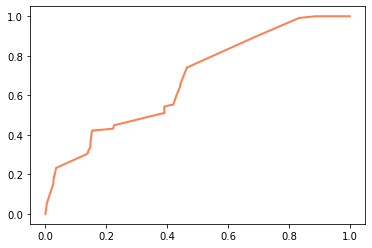

In [3805]:
binary_classifier_evaluation("Random Forest",X_test, Y_test, y_pred, y_pred_proba,clf_RF)

## Improvements <a id="Improvements"></a>

### Random Forest parameters improvement <a id="RFPI"></a>

0.4396551724137931


<ipython-input-3806-3a410e3ecbfa>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_RF.fit(X_train,Y_train)
<ipython-input-3806-3a410e3ecbfa>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_RF.fit(X_train,Y_train)
<ipython-input-3806-3a410e3ecbfa>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_RF.fit(X_train,Y_train)


0.4396551724137931
0.4396551724137931


<ipython-input-3806-3a410e3ecbfa>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_RF.fit(X_train,Y_train)


0.4396551724137931


<ipython-input-3806-3a410e3ecbfa>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_RF.fit(X_train,Y_train)


0.4396551724137931


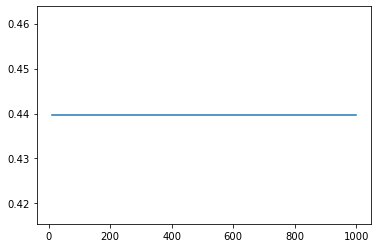

In [3806]:
from sklearn.metrics import recall_score
recalls = []
nb_trees = [10,50,100,500,1000]
for i in nb_trees:
    clf_RF = RandomForestClassifier(n_estimators=i, random_state=2)
    clf_RF.fit(X_train,Y_train)
    
    # Make predict on the test set features
    y_pred = clf_RF.predict(X_test)
    recalls.append(recall_score(Y_test, y_pred))
    print(recall_score(Y_test,y_pred))
    
import matplotlib.pyplot as plt
plt.plot(nb_trees, recalls)

### Decision Tree hyperparameters improvement <a id="DTHI"></a>

In [3807]:
# Explications : https://www.youtube.com/watch?v=w_bLGK4Pteo
# Grid Search et cross validation
#Find the best Hyperparameters cross validation
criterions = ['gini', 'entropy']
max_depth = [1,3,5,7,9,11,13,15]

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = clf_DT, scoring="recall" , cv=5, param_grid={'criterion': criterions, 'max_depth': max_depth})

grid.fit(X_train, Y_train)
print("Best parameters", grid.best_params_)

Best parameters {'criterion': 'entropy', 'max_depth': 3}


In [3808]:
from sklearn.tree import DecisionTreeClassifier
clf_DT= DecisionTreeClassifier(criterion='entropy', max_depth=13,random_state=2)
clf_DT.fit(X_train,Y_train)
y_pred_proba=clf_DT.predict_proba(X_test)
y_pred=clf_DT.predict(X_test)

Decision tree


CONFUSION MATRIX : 

[[569 115]
 [ 76  40]]


ACCURACY OF THE MODEL : 

0.76125


CLASSIFICATION REPORT : 

              precision    recall  f1-score   support

           0       0.88      0.83      0.86       684
           1       0.26      0.34      0.30       116

    accuracy                           0.76       800
   macro avg       0.57      0.59      0.58       800
weighted avg       0.79      0.76      0.77       800



ROC-AUC SCORE : 

0.5883494656180681


ROC CURVE : 

False positivze rate [0.         0.03216374 0.16812865 0.17397661 0.42397661 0.44590643
 0.44883041 0.75877193 0.95614035 1.        ]
True negative rate [0.         0.20689655 0.34482759 0.39655172 0.60344828 0.68965517
 0.68965517 0.84482759 0.94827586 1.        ]
Thresholds [2.         1.         0.64516129 0.5        0.46153846 0.26666667
 0.25       0.09090909 0.07924528 0.        ]


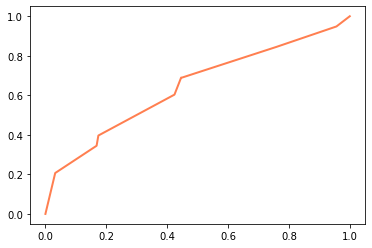

In [3809]:
binary_classifier_evaluation("Decision tree",X_test, Y_test, y_pred, y_pred_proba,clf_DT)

### Random Forest hyperparameters improvement <a id="RFHI"></a>

In [3810]:
#Find the best Hyperparameters combinaison by cross validation
criterions = ['gini', 'entropy']
#max_depth = [1,3,5,7,9,11,13,15]
nb_estimators=[10,500,700]

#cross validation
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = clf_RF, scoring="recall" , cv=5, param_grid={'n_estimators':nb_estimators,'criterion': criterions})

#train the set with to find the best hyperparameters
grid.fit(X_train, Y_train)
print("Best parameters", grid.best_params_)

D:\Programmation\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programmation\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programmation\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programmation\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector 

Best parameters {'criterion': 'gini', 'n_estimators': 700}


## Model performance according to the train set size <a id="ModelPerf"></a>

[ 298  596  895 1193 1492]


<function matplotlib.pyplot.legend(*args, **kwargs)>

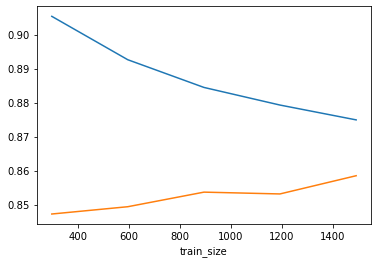

In [3811]:
from sklearn.model_selection import learning_curve
# Avec le décision tree
N, train_score,val_score=learning_curve(clf_DT,X_train,Y_train,train_sizes=np.linspace(0.2,1.0,5),cv=5)
print(N)
plt.plot(N,train_score.mean(axis=1),label="train")
plt.plot(N,val_score.mean(axis=1),label="validation")
plt.xlabel("train_size")
plt.legend

D:\Programmation\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programmation\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programmation\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programmation\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector 

<function matplotlib.pyplot.legend(*args, **kwargs)>

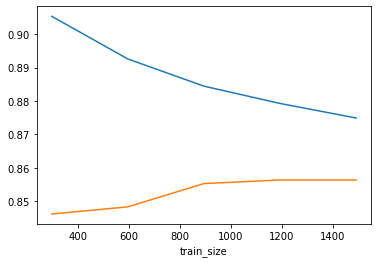

In [3812]:
# Avec le random forest
N, train_score,val_score=learning_curve(clf_RF,X_train,Y_train,train_sizes=np.linspace(0.2,1.0,5),cv=5)
# print(N)
plt.plot(N,train_score.mean(axis=1),label="train")
plt.plot(N,val_score.mean(axis=1),label="validation")
plt.xlabel("train_size")
plt.legend

## Linear regression <a id="LR"></a>

### Dataset <a id="Data"></a>

In [3813]:
df_telecoms.head()

,State,Account length,Area code,International plan,Voice mail plan,Customer service calls,Churn
0,KS,128,415,No,Yes,1,False
1,OH,107,415,No,Yes,1,False
2,NJ,137,415,No,No,0,False
3,OH,84,408,Yes,No,2,False
4,OK,75,415,Yes,No,3,False


In [3814]:
df_telecoms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   State                   2666 non-null   object
 1   Account length          2666 non-null   int64 
 2   Area code               2666 non-null   int64 
 3   International plan      2666 non-null   object
 4   Voice mail plan         2666 non-null   object
 5   Customer service calls  2666 non-null   int64 
 6   Churn                   2666 non-null   bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 127.7+ KB


In [3815]:
x=df_telecoms.drop(["State", "International plan", "Voice mail plan", "Churn"],axis=1)
x['Account length'] = x.apply(lambda x: x/100, axis=1)['Account length']
x['Area code'] = x.apply(lambda x: x/100, axis=1)['Area code']
x=x.to_numpy()
y=df_telecoms["Churn"]
y= y.astype("int")
y=y.to_numpy()
y=y.reshape(y.shape[0],1)

In [3816]:
x.shape

(2666, 3)

In [3817]:
y.shape

(2666, 1)

In [3818]:
X=np.hstack((x,np.ones((x.shape[0],1))))
print(X.shape)
print(X)

(2666, 4)
[[1.28 4.15 1.   1.  ]
 [1.07 4.15 1.   1.  ]
 [1.37 4.15 0.   1.  ]
 ...
 [0.68 4.15 3.   1.  ]
 [0.28 5.1  2.   1.  ]
 [0.74 4.15 0.   1.  ]]


In [3819]:
theta = np.random.rand(4,1)
theta.shape
print(theta)

[[0.07322162]
 [0.25257406]
 [0.12477051]
 [0.84140954]]


### Model <a id="model"></a>

In [3820]:
def model(X,theta):
    return X.dot(theta)

In [3821]:
model(X,theta)

array([[2.10808607],
       [2.09270953],
       [1.9899055 ],
       ...,
       [2.31369412],
       [2.39958031],
       [1.94377588]])

### Cost Function <a id="CF"></a>

In [3822]:
def cost_function(X,y,theta):
    m=len(y)
    return (1/(2*m))*np.sum((model(X,theta)-y)**2)

In [3823]:
cost_function(X,y,theta)

2.2115862075563633

### Gradient descent <a id="GD"></a>

In [3824]:
def grad(X,y,theta):
    m=len(y)
    return (1/m)*X.T.dot(model(X,theta)-y)

In [3825]:
def gradient_descent(X,y,theta, learning_rate,n_iterations):
    for i in range(0,n_iterations):
        theta=theta-learning_rate*(grad(X,y,theta))
    return theta

### Train and Evaluate the model <a id="TEM"></a>

In [3826]:
theta_final = gradient_descent(X,y,theta,learning_rate=0.001, n_iterations=100)
theta_final

array([[-0.00688557],
       [-0.09581611],
       [ 0.00286868],
       [ 0.76184764]])

In [3827]:
cost_function(X,y,theta_final)

0.08173457612526158

In [3828]:
y_pred = model(X,theta_final)
y_pred

array([[0.35826595],
       [0.35971192],
       [0.35477756],
       ...,
       [0.36813465],
       [0.2769949 ],
       [0.35911547]])

In [3829]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y,y_pred)

0.38628560703211035

In [3830]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,y_pred)

0.16346915225052316

In [3831]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y,y_pred) # x peut expliquer en partie la variablilité de y 
# et ici on cherche à savoir le % de fiabilité que l'on peut accorder à x sur y

-0.009603936402352575

### With sklearn <a id="WS"></a>

In [3832]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [3833]:
model_regression=linear_model.LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=2)
print(model_regression.fit(x_train,y_train))
print(model_regression.coef_)
y_predict=model_regression.predict(x_test)

LinearRegression()
[[ 0.01806764 -0.01148221  0.04952513]]


In [3834]:
r_squared=model_regression.score(x_test,y_test)
from sklearn.metrics import explained_variance_score
var=explained_variance_score(y_test,y_predict)
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(y_test,y_predict,squared=False)
print(r_squared)
print(var)
print(rmse)

0.04557346569242737
0.05378739114137587
0.3237427519061068


In [3835]:
mean_absolute_error(y_test,y_predict)

0.23223679622303217

In [3836]:
mean_squared_error(y_test,y_predict)

0.10480936941173903

In [3837]:
explained_variance_score(y_test,y_predict)

0.05378739114137587